In [9]:
import numpy as np
import matplotlib.pyplot as plt
import glob, os
import pandas as pd

import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

In [10]:
folder = "../build/"
all_folders = glob.glob(os.path.join(folder, "fbmc_*/"))
all_folders.sort(key=os.path.getmtime, reverse=True)
print("Recent simulation folders:")
for f in all_folders[:5]:
    print(f)


Recent simulation folders:
../build/fbmc_Si_300.0_0/


Number of files found: 10


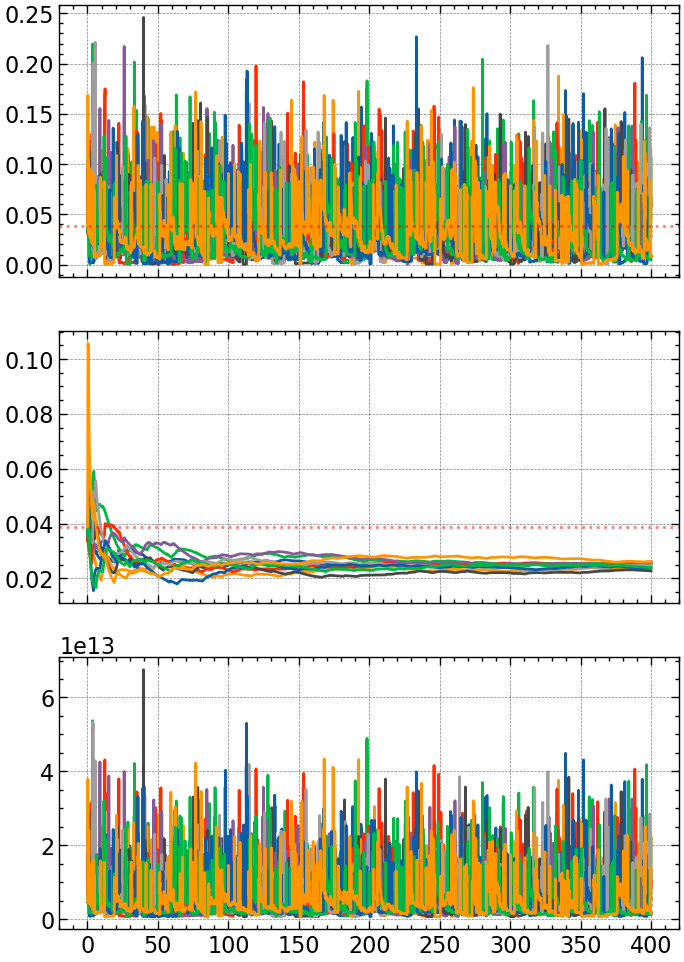

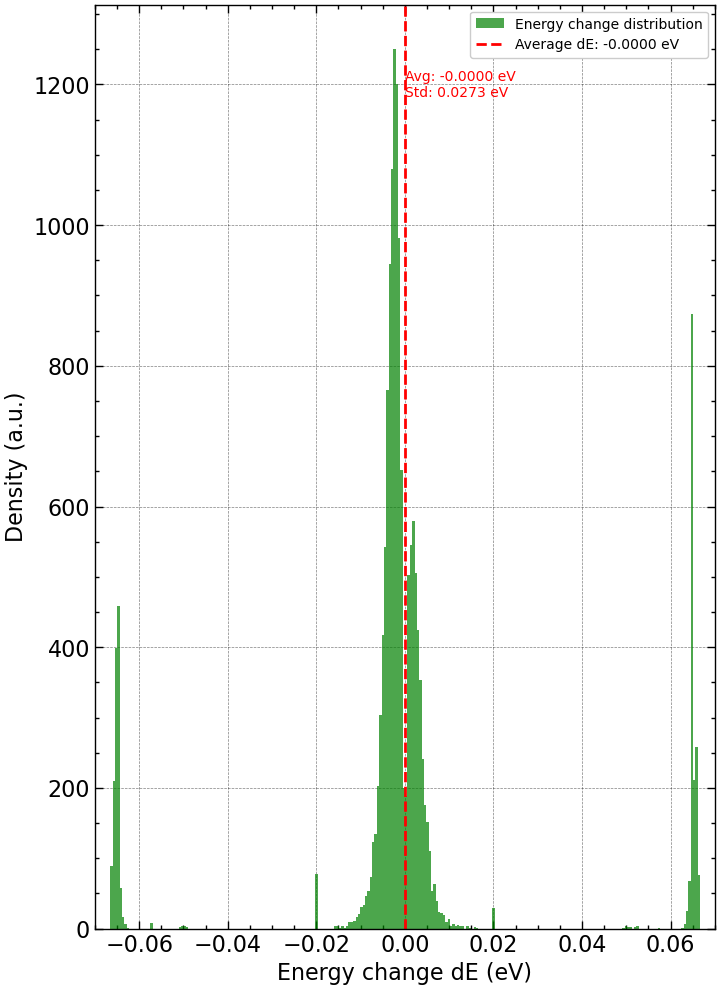

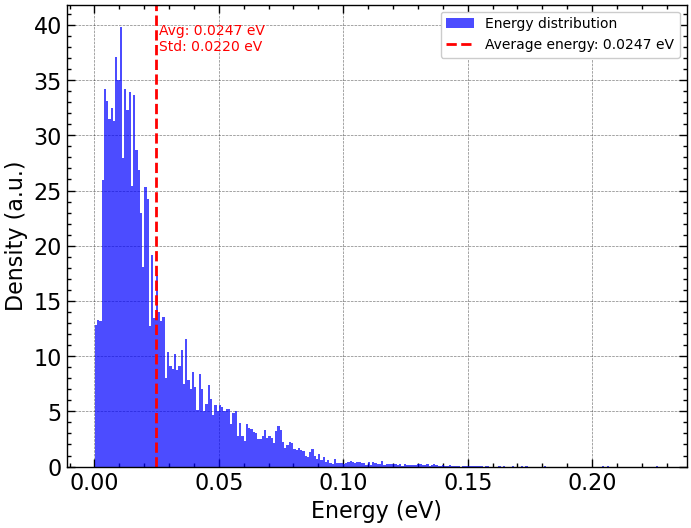

Largest energy change dE: 0.0666 eV
Corresponding gamma before change: 5930010000000.0000


In [ ]:
kB = 8.617333262145e-5  # eV/K
T = 300  # K
thermal_energy = (3.0/2.0) * kB * T


for folder in all_folders:

    all_files = glob.glob(os.path.join(folder, "simulation_result*.csv"))
    # sort files by modification time
    all_files.sort(key=os.path.getmtime, reverse=True)
    print(f"Number of files found: {len(all_files)}")
    fig, ax = plt.subplots(3, sharex=True, figsize=(8, 12))
    NbFilesToPlot = 20
    NbFilesToPlot = len(all_files)  # plot all files
    all_energies = np.array([])
    all_gammas = np.array([])
    all_dE = np.array([])
    for file in all_files[:NbFilesToPlot]:
        data = np.loadtxt(file, delimiter=',', skiprows=1)
        time = 1e12 * data[:, 0]
        nb_cols = data.shape[1]
        energy_data = data[:, nb_cols - 1]
        gamma_data = data[:, 1]
        cum_mean = np.cumsum(energy_data) / np.arange(1, len(energy_data) + 1)
        ax[0].plot(time, energy_data)
        ax[1].plot(time, cum_mean)
        ax[2].plot(time, gamma_data)
        final_mean = cum_mean[-1]
        size_energy = energy_data.shape[0]
        all_energies = np.concatenate((all_energies, energy_data[size_energy//2:]), axis=0)
        all_gammas = np.concatenate((all_gammas, gamma_data[size_energy//2:]), axis=0)
        dEs = np.diff(energy_data)
        dEs = dEs[np.abs(dEs) > 0.0]  # filter out large jumps
        all_dE = np.concatenate((all_dE, dEs[1:]), axis=0)
    ax[0].axhline(thermal_energy, color='r', linestyle=':', label=f'Thermal energy: {thermal_energy:.4f} eV', alpha=0.5)
    ax[1].axhline(thermal_energy, color='r', linestyle=':', label=f'Thermal energy: {thermal_energy:.4f} eV', alpha=0.5)

    # Plot dE
    figg, ax = plt.subplots(1, sharex=True, figsize=(8, 12))
    ax.hist(all_dE, bins=250, density=False, alpha=0.7, color='g', label='Energy change distribution')
    avg_dE = np.mean(all_dE)
    std_dE = np.std(all_dE)
    ax.axvline(avg_dE, color='r', linestyle='--', label=f'Average dE: {avg_dE:.4f} eV')
    ax.text(avg_dE + 0.05*avg_dE, ax.get_ylim()[1]*0.9, f'Avg: {avg_dE:.4f} eV\nStd: {std_dE:.4f} eV', color='r')
    ax.legend(fontsize=10)
    ax.set_xlim(-0.07, 0.07)
    ax.set_xlabel("Energy change dE (eV)")
    ax.set_ylabel("Density (a.u.)")
    plt.show()
        

    fig, ax = plt.subplots(1, figsize=(8, 6))
    ax.hist(all_energies, bins=250, density=True, alpha=0.7, color='b', label='Energy distribution')
    avg_energy = np.mean(all_energies)
    std_energy = np.std(all_energies)
    ax.axvline(avg_energy, color='r', linestyle='--', label=f'Average energy: {avg_energy:.4f} eV')
    ax.text(avg_energy + 0.05*avg_energy, ax.get_ylim()[1]*0.9, f'Avg: {avg_energy:.4f} eV\nStd: {std_energy:.4f} eV', color='r')
    ax.legend(fontsize=10)
    ax.set_xlabel("Energy (eV)")
    ax.set_ylabel("Density (a.u.)")
    plt.show()



    argmaxDE = np.argmax(np.abs(all_dE))
    print(f"Largest energy change dE: {all_dE[argmaxDE]:.4f} eV")
    print(f"Corresponding gamma before change: {all_gammas[argmaxDE]:.4f}")

In [12]:
file_phononss = glob.glob(os.path.join(folder, "*eph*.msh"))
print(file_phononss)
data_phonons = np.loadtxt(file_phononss[0], delimiter=',', skiprows=1)
NbCols = data_phonons.shape[1]
# vtx, band, energy, rates...
energies_ph = data_phonons[:, 2]
total_rates_ph = np.sum(data_phonons[:, 3:NbCols], axis=1)
fig, ax = plt.subplots(1, figsize=(8, 6))

ene_fbmc = energy_data
gamma_fbmc = gamma_data

ax.scatter(ene_fbmc, gamma_fbmc, s=1, c='r', label='FBMC data')
ax.scatter(energies_ph, total_rates_ph, s=1, c='b', label='Phonon data')
# for idx in range(0, 8):
#     rates_ph = data_phonons[:, 3 + idx]
#     ax.scatter(energies_ph, rates_ph, s=1)
ax.set_xlabel("Phonon Energy (eV)")
ax.set_ylabel("Total Scattering rate (1/s)")
ax.legend(fontsize=10, loc='upper right')
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 0.2e14)
plt.show()

[]


IndexError: list index out of range

['../build/mesh2_T300K_C2V3_N399413_eph_rates.msh']


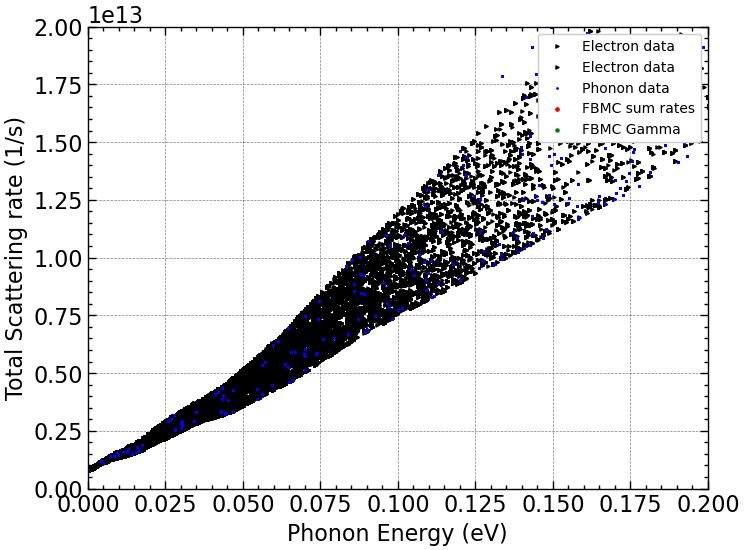

In [ ]:
file_phononss = glob.glob(os.path.join(folder, "*eph*.msh"))
print(file_phononss)
data_phonons = np.loadtxt(file_phononss[0], delimiter=',', skiprows=1)
NbCols = data_phonons.shape[1]
# vtx, band, energy, rates...
energies_ph = data_phonons[:, 2]
total_rates_ph = np.sum(data_phonons[:, 3:NbCols], axis=1)



file_gammas = folder + "eelph_test_output.txt"
data_gammas = np.loadtxt(file_gammas, delimiter=',', skiprows=1)
energies_gammas = data_gammas[:, 0]
rates_gammas = data_gammas[:, 1:]
sum_rates_gammas = np.sum(rates_gammas, axis=1)

file_fin = f"{folder}fbmc_debug_log.txt"
data_fbmc = pd.read_csv(file_fin, names=["energy", "sum_rates", "Gamma"])
energies_fbmc = data_fbmc["energy"].to_numpy()
sum_rates_fbmc = data_fbmc["sum_rates"].to_numpy()
gammas_fbmc = data_fbmc["Gamma"].to_numpy()



fig, ax = plt.subplots(1, figsize=(8, 6))
ax.scatter(energies_gammas, sum_rates_gammas, s=5, c='k',marker='>', label='Electron data')
ax.scatter(all_energies, all_gammas, s=5, c='k',marker='>', label='Electron data')
ax.scatter(energies_ph, total_rates_ph, s=1, c='b', label='Phonon data')
ax.scatter(energies_fbmc, sum_rates_fbmc, s=5, c='r', marker='x', label='FBMC sum rates')
ax.scatter(energies_fbmc, gammas_fbmc, s=5, c='g', marker='o', label='FBMC Gamma')

# for idx in range(0, 8):
#     rates_ph = data_phonons[:, 3 + idx]
#     ax.scatter(energies_ph, rates_ph, s=1)
ax.set_xlabel("Phonon Energy (eV)")
ax.set_ylabel("Total Scattering rate (1/s)")
ax.legend(fontsize=10, loc='upper right')
ax.set_xlim(0, 0.2)
ax.set_ylim(0, 0.2e14)
plt.show()

/tmp/ipykernel_50158/2978429793.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)


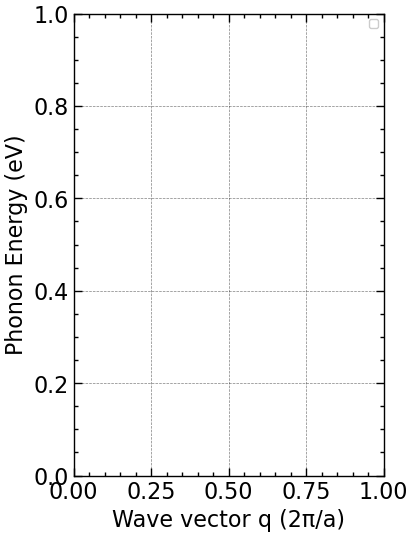

In [ ]:
files = glob.glob(os.path.join(folder, "*_dispersion.csv"))
fig, ax = plt.subplots(1, figsize=(4, 6))
for f in files:
    q, omega, energy = np.loadtxt(f, delimiter=',', unpack=True, skiprows=1)

    a = 5.43e-10  # m
    fact = 2 * np.pi / a
    q_scaled = q / fact
    ax.plot(q_scaled, energy, label=os.path.basename(f).replace("_dispersion.csv",""))
# ax.set_xlim(0, 1)
ax.set_xlabel("Wave vector q (2π/a)")
ax.set_ylabel("Phonon Energy (eV)")
ax.legend(fontsize=8)
plt.show()